In [973]:
import collections
import hashlib
import random
import string
from urllib import request

from IPython import display
import matplotlib.pyplot as plt

In [974]:
%matplotlib inline

<h1> Ever wonder how blockchains actually work? </h1>


<h3> Dr. David R. Pugh </h3>

<img src="kapsarc-logo.jpg">

The purpose of this notebook is to start cutting through the hype surrounding blockchain use cases in the energy sector by 
explaining the key ideas of behind the blockchain data structure. A follow on notebook will discuss the key ideas and energy sector use cases for that use the blockchain data structure as a distributed database. 

<h2>Hash Functions</h2>

In order to understand how a blockchain works, it is important to understand the concept of a <a href="https://en.wikipedia.org/wiki/Hash_function">hash function</a>. A hash function is a function that compresses data of arbitrary size (measured in terms of number of bits where 8 bits equals 1 byte) into data of some fixed size. The actual size of the compressed data depends on the specific implementation of the hash function. The compressed data returned by hash functions is sometimes called a hash value, hash code, hash digest, or simply a hash. Given the same input data a hash function will <em>always</em> return the same hash value!

A hash algorithm is a particular implementation of a hash function.  There are a number of various <a href="https://en.wikipedia.org/wiki/List_of_hash_functions">hash algorithms</a>.

In [975]:
# complete listing of available hashing algorithms...
hashlib.algorithms_available

{'DSA',
 'DSA-SHA',
 'MD4',
 'MD5',
 'RIPEMD160',
 'SHA',
 'SHA1',
 'SHA224',
 'SHA256',
 'SHA384',
 'SHA512',
 'blake2b',
 'blake2s',
 'dsaEncryption',
 'dsaWithSHA',
 'ecdsa-with-SHA1',
 'md4',
 'md5',
 'ripemd160',
 'sha',
 'sha1',
 'sha224',
 'sha256',
 'sha384',
 'sha3_224',
 'sha3_256',
 'sha3_384',
 'sha3_512',
 'sha512',
 'shake_128',
 'shake_256',
 'whirlpool'}

While each hash algorithm is different, there are a few properties that any hash algorithm should satisfy.

<ul>
    <li><p><strong>Uniformity:</strong> Any given output of a hash algorithm should be in some sense equally likely. If we compute large numbers of hash digests using our hash algorithm, then there should be no identifiable pattern to where the hash digests fall within the space of possible hash digests generated by the hash algorithm.</p></li>
    <li><p><strong>Non-invertibility:</strong> Property implies that it should be impossible, or at least prohibitively difficult, to work out the input data given the hash digest. A good hash algorithm makes is easy to compute the hash digest for given input data, but pratically impossible to invert the algorithm to obtain the input data from the hash digest. More formally the non-invertibility property of hash algorithms is a particular example of the more general notion of a <a href="https://en.wikipedia.org/wiki/One-way_function">one-way function</a>.</p></li>
    <li><p><strong>Discontinuity:</strong> A hash algorithm with this property will produce wildly different hash digests for similar input data. Marginal changes in the input data should produce almost total change in the resulting hahs digest. Sometimes this property is referred to as the <a href="https://en.wikipedia.org/wiki/Avalanche_effect">avalanche effect</a>.</p></li>
</ul>

<h3> Example: SHA256 algorithm </h3>

A commonly used hashing agorithm is <a href="https://en.wikipedia.org/wiki/SHA-2"/>SHA256</a>. SHA256 is a member of class of hash algorithms called <a = href="https://en.wikipedia.org/wiki/Secure_Hash_Algorithms">secure hash algorithms (SHA)</a> that are widely used in blockchain applications (particularly the Bitcoin and Ethereum blockchains). Let's take apply the SHA256 algorithm to some bytes of data.

In [976]:
# example using the SHA256 algorithm to hash my GitHub handle...
h1 = hashlib.sha256(b"davidrpugh")

Couple of things to note about SHA 256  First, the 256 in SHA256 refers to the fact that the fixed length output of the algorithm is 256 bits (or 256 / 8 = 32 bytes). Second, you will see the output of hash algorithms represented as a number in <a href="https://en.wikipedia.org/wiki/Hexadecimal">hexadecimal</a>, a positional number system that uses 16 distinct symbols (i.e., 0-9 and a-f) instead of the usual ten (i.e., 0-9). For example here is the hexadecimal representation of the hash digest of my GitHub handle produced by the SHA256 algorithm.

In [977]:
# displays the hash digest as a hexadecimal number
h1.hexdigest()

'52295f73179b76b7c371589b1a60e7059e5d12b04cc800d9901b835bc38fd67c'

Recall that each hash algorithm always outputs data of a fixed size; in the case of SHA256 this size is 256 bits or 32 bytes. To see that this is true, let's use the SHA256 algorithm to hash the entire contents of Herman Melville's <em>Moby Dick</em>!

In [23]:
# grab the full text of Moby Dick from project Gutenbuerg!
moby_dick_url = "https://www.gutenberg.org/files/2701/2701-0.txt"

# read the entire text into memory as a string of bytes!
with request.urlopen(moby_dick_url) as handle:
    entire_contents_moby_dick = handle.read()

Exactly how large is <em>Moby Dick</em>? The entire contents can be stored in less than 1.3 MB!

In [31]:
len(entire_contents_moby_dick)

1276800

Now we can apply the SHA256 hash algorithm to the contents of <em>Moby Dick</em> and check that the length of its hash digest is that same as that generated for my GitHub handle above.

In [36]:
# hash the entire contents of Moby Dick using SHA256 algorithm...
h2 = hashlib.sha256(entire_contents_moby_dick)

# ...and look at the hexadecimal digest.
h2.hexdigest()

'fde50319a398be3bf8d53238eca38938ab54829abbae90546dd2a7aab766e8a1'

In [37]:
len(h1.hexdigest()) == len(h2.hexdigest())

True

<h4>Does the SHA256 algorithm exhibit the three properties of a "good" hash algorithm?</h4>

First we will define a few helper functions that we can use to explore the SHA256 hash algorithm.

In [696]:
def random_string(seed, weights=None, k=1):
    prng = random.Random(seed)
    characters = string.ascii_letters + string.punctuation + string.whitespace
    return ''.join(prng.choices(characters, weights=weights, k=k))


def string_to_bytes(s, encoding="utf-8"):
    return bytes(s, encoding)


def sha256_digest(b):
    hash_object = hashlib.sha256(b)
    return hash_object.digest()


def sha256_hexdigest(b):
    hash_object = hashlib.sha256(b)
    return hash_object.hexdigest()


def random_sha256_hexdigest(seed, weights=None, input_length=1):
    return sha256_hexdigest(string_to_bytes(random_string(seed, weights, k=input_length)))


def hexadecimal_to_int(hexadecimal):
    return int(hexadecimal, 16)



<h5> Uniformity </h5>

We can run a simulation to demonstrate that the SHA256 hash algorithm generates uniformly random hash digests given some input data. Basic idea is to use our helper function to generate "fake" input data, compute the SHA256 hash digest for the input data, and then plot a histogram of the results.  We should see that the results are roughly uniformly distributed across the range of possible values. 

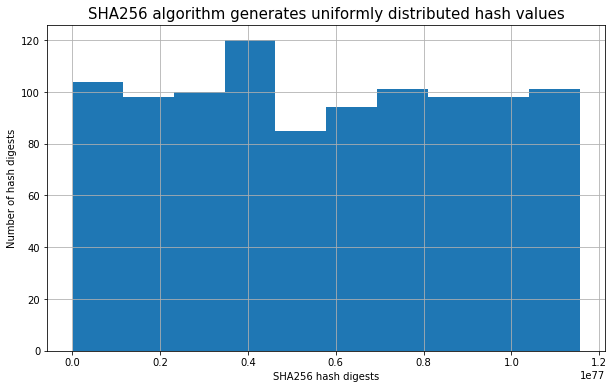

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist([hexadecimal_to_int(random_sha256_hexdigest(n, input_length=10000)) for n in range(1000)])
ax.grid(True)
ax.set_ylabel("Number of hash digests")
ax.set_xlabel("SHA256 hash digests")
ax.set_title("SHA256 algorithm generates uniformly distributed hash digests", fontsize=15)
plt.show()

<h5> Non-invertability </h5>

Bitcoin is built on the assumption that inverting the SHA256 hash algorithm is prohibitively difficult. Mining bitcoin effectively reduces to finding a particular integer `n` such that the following inequality holds.

    sha256_digest(n; data) < target_difficulty

If inverting the SHA256 hash algorithm was easy, then finding a solution to this inequality would be <em>trivially</em> easy (in which case Bitcoin would be easy to mine and the market would be flooded with Bitcoins). 

In [980]:
def bitcoin_miner(n, data):
    """Given an integer, n, compute a SHA256 hash of n with a block of data."""
    _bytes_repr = bytes(n) + data
    return hexadecimal_to_int(sha256_hexdigest(_bytes_repr))


def mine_bitcoin(block, threshold, max_itertions=1000000):
    """Solves the hashing puzzle to mine a block of data given some difficulty threshold."""
    result = float("inf")
    n = 0
    num_iterations = 0
    while result > threshold and num_iterations < max_itertions:
        result = bitcoin_miner(n, block)
        n +=1
        num_iterations += 1
    return (True, result, num_iterations) if num_iterations < max_itertions else (False, result, num_iterations)

In [ ]:
# max 32-bit hexadecimal is the minimum difficulty
maximum_threshold = int("FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF", 16)

# create some difficulty thresholds
difficulty_targets = [pow(10, n) for n in range(8)]
thresholds = [maximum_threshold // difficulty_target for difficulty_target in difficulty_targets]

# for each difficulty threshold, compute the number of hash digests that need to be computed to mine a block
hash_counts = []
for threshold in thresholds:
    data = string_to_bytes(random_string(42, k=10000))
    (_, _, hash_count) = mine_bitcoin(data, threshold)
    hash_counts.append(hash_count)

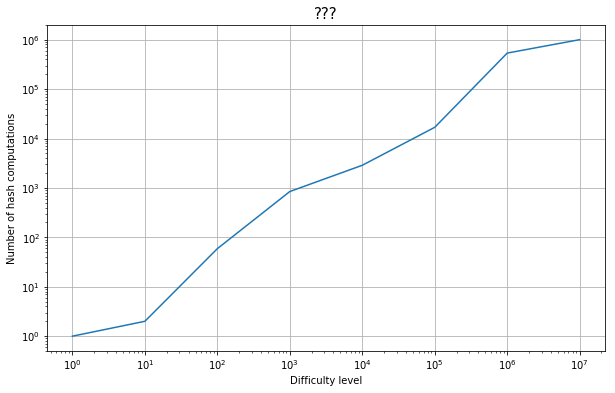

In [648]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(difficulty_targets, hash_counts)
ax.grid(True)
ax.set_ylabel("Number of hash digest computations")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Difficulty target")
ax.set_title("Number of hash digest computations grows exponentially with the difficulty target!", fontsize=15)
plt.show()

<h5> Discontinuity </h5>

Checking the discontinuity property is more straightforward. Remember that minor changes in the input data should generate dramatically different hash digests. Let's just compare the hash digests of two sequences of bytes that are almost identical.

In [ ]:
digest1 = sha256_hexdigest(b"davidrpugh")

In [ ]:
digest1 

In [ ]:
digest2 = sha256_hexdigest(b"davidrpugi")

In [ ]:
digest2

<h2> Block </h2>

A blockchain is simply a particular way of organizing data so that it can be used efficiently for certain applications. Put more simply, a blockchain is a particular kind of <a href="https://en.wikipedia.org/wiki/Data_structure">data structure</a>.  There are many kinds of <a href="https://en.wikipedia.org/wiki/List_of_data_structures">data structures</a>, some of which, for example the <a href="https://en.wikipedia.org/wiki/Doubly_linked_list">doubly linked list</a>, share many features with blockchains.  Let's start out by implementing a `Block` as a simple storage container for some `data`.

In [677]:
class Block:

    def __init__(self, data):
        """Class representing a block of data."""
        self._data = data
        
    @property
    def data(self):
        """The underlying data stored in the block."""
        return self._data
    
    @data.setter
    def data(self, updated):
        """Update the data stored in the block."""
        self._data = updated
    

While the data stored in our blocks above are just simple strings of bytes, that actual data that is stored in each block can be arbitrary and will vary accross specific use-cases. For example, for crypto-currency applications, the blocks of data are collections of transactions between users. 

Let's create some blocks of data! Here the data stored in the blocks will mimic transactions for the buying/selling of electricity between households.  If you think this is unrealistic, it is already being done! See <a href="https://powerledger.io/">PowerLedger</a>, <a href="https://www.brooklyn.energy/">Brooklyn Microgrid</a>, <a href="http://gridsingularity.com/">Grid Singularity</a>, et al.

In [678]:
block0 = Block(b"Household A sends 1 kWh of elecricity to Household B.")
block1 = Block(b"Household C sends $1 to Household A.")
block2 = Block(b"Household A sends 1 kWh of elecricity to Household C.")
block3 = Block(b"Household B sends $1 to Household A.")


In addition that storing the data, we will probably want to store some metadata about each block.  Again what kind of metadata to store will depend on the nature of your application.  For now, let's just store the block number (which can be thought of as an index).

In [679]:
class Block:

    def __init__(self, data, index):
        """Class representing a block of data."""
        self._data = data
        self._index = index
    
    @property
    def data(self):
        """The underlying data stored in the block."""
        return self._data
    
    @data.setter
    def data(self, updated):
        """Update the data stored in the block."""
        self._data = updated
        
    @property
    def index(self):
        """The block index."""
        return self._index
    

Re-create the blocks to include some block metadata (i.e., block `index`).

In [687]:
block0 = Block(b"Household A sends 1 kWh of elecricity to Household B.", 0)
block1 = Block(b"Household C sends $1 to Household A.", 1)
block2 = Block(b"Household A sends 1 kWh of elecricity to Household C.", 2)
block3 = Block(b"Household B sends $1 to Household A.", 3)


In [688]:
# can examine the data attribute of block 1
block1.data

b'Household C sends $1 to Household A.'

In [689]:
# can examine the index attribute of block 2
block2.index

2

<h3>Computing the hash for a `Block`</h3>

Understanding exactly what it means to compute the hash digest for a `Block` is key to understanding why it is easy for someone to verify the integrity of data stored in the `Block`. Computing the hash digest of a given block is not as simple as computing the hash digest of the block's data. To compute the hash digest of a block, we first need to combine the block's metadata and data. The hash digest for the given block is then the hash digest of this combined data.

Consider `block1` as defined above.  If we compute the hash digest of only the data contained in this block we would get the following.

In [692]:
h1 = hashlib.sha256(block1.data)
h1.hexdigest()

'c64b1f65e3d5284f52300cb2c729641caa7576bd8feef04ac634154e602190b2'

However when we combine the metadata (in this case is simply the block number) with the `block1` data, then we get the following result.

In [698]:
h2 = hashlib.sha256( block1.data + bytes(block1.index)) 
h2.hexdigest()

'fb02acee77e5ec7c6c27b7133da0114d30cdec2ffbab6e107ce0d0c4991cb20f'

These two hash values are not the same!

<h3> Signing a `Block` </h3>

Another key idea behind 

In [924]:
class Block:

    def __init__(self, data, index, nonce):
        """Class representing a block of data."""
        self._data = data
        self._index = index
        self._nonce = nonce
    
    @property
    def _bytes_repr(self):
        """Bytes representation of te Block."""
        return self.data + bytes(self.index) + bytes(self.nonce)
    
    @property
    def data(self):
        """The underlying data stored in the block."""
        return self._data
    
    @data.setter
    def data(self, updated):
        """Update the data stored in the block."""
        self._data = updated
        
    @property
    def digest(self):
        hasher = hashlib.sha256(self._bytes_repr)
        return hasher.digest()
    
    @property
    def hexdigest(self):
        hasher = hashlib.sha256(self._bytes_repr)
        return bytes(hasher.hexdigest(), "utf-8")
        
    @property
    def index(self):
        """The block index."""
        return self._index
    
    @property
    def nonce(self):
        """The block nonce."""
        return self._nonce
    
    @nonce.setter
    def nonce(self, updated):
        """Update the value of the block nonce."""
        self._nonce = updated
        
    def sign(self, target):
        """Sign a block by find a nonce such that the hash digest of the block with this nonce is lower than some target."""
        while int(self.hexdigest, 16) > target:
            self.nonce += 1  # SIDE EFFECT!
    

In [925]:
block0 = Block(b"Household A sends 1 kWh of elecricity to Household B.", 0, 42)
block1 = Block(b"Household C sends $1 to Household A.", 1, 1234)
block2 = Block(b"Household A sends 1 kWh of elecricity to Household C.", 2, 45)
block3 = Block(b"Household B sends $1 to Household A.", 3, 4321)


In [926]:
block0.hexdigest

b'2ae30c74d9417775ef81736206d803d4e32753f7e89c99804465ed88b7881f5a'

In [927]:
minimum_difficulty = int("FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF", 16)
target_difficulty = minimum_difficulty // 1000
block0.sign(target_difficulty)

In [928]:
block0.hexdigest

b'0017091a536413d719352c754d4865c93ddc3b3bc347f56e8cda6320d4b10125'

In [929]:
%timeit block2.sign(target_difficulty)

12.5 µs ± 1e+03 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


To put this timing in perspective, currently signing a new block of Bitcoin transactions data requires finding a hash digest that starts with 30 zeros!  It should now be obvious why is is no longer profitable to mine bitcoin using a CPU.

<h3>Blockchain</h3>

Now that we have defined our `Block` we need to discuss how to chain block together.  The easiest way to do this is to have each `Block` store a pointer to the `previous` block in the chain. Note that the original block has no `previous` block, so we can just set its `previous` pointer to be `None`.

In [930]:
class Block:

    def __init__(self, data, index, nonce, previous):
        """Class representing a block of data."""
        self._data = data
        self._index = index
        self._nonce = nonce
        self._previous = previous
    
    @property
    def _bytes_repr(self):
        """Bytes representation of te Block."""
        return self.data + bytes(self.index) + bytes(self.nonce)
    
    @property
    def data(self):
        """The underlying data stored in the block."""
        return self._data
    
    @data.setter
    def data(self, updated):
        """Update the data stored in the block."""
        self._data = updated
        
    @property
    def digest(self):
        hasher = hashlib.sha256(self._bytes_repr)
        return hasher.digest()
    
    @property
    def hexdigest(self):
        hasher = hashlib.sha256(self._bytes_repr)
        return bytes(hasher.hexdigest(), "utf-8")
        
    @property
    def index(self):
        """The block index."""
        return self._index
    
    @property
    def nonce(self):
        """The block nonce."""
        return self._nonce
    
    @nonce.setter
    def nonce(self, updated):
        """Update the value of the block nonce."""
        self._nonce = updated
        
    @property
    def previous(self):
        """A pointer to the previous block in the chain."""
        return self._previous
        
    def sign(self, threshold):
        """Sign a block by find a nonce such that the hash digest of the block with this nonce is lower than some threshold."""
        while int(self.hexdigest, 16) > threshold:
            self.nonce += 1  # SIDE EFFECT!
    

In [931]:
block0 = Block(b"Household A sends 1 kWh of elecricity to Household B.", 0, 42, None)
block1 = Block(b"Household C sends $1 to Household A.", 1, 1234, block0)
block2 = Block(b"Household A sends 1 kWh of elecricity to Household C.", 2, 45, block1)
block3 = Block(b"Household B sends $1 to Household A.", 3, 4321, block2)


We can encapsulate the logic of chaining blocks into a `Blockchain` class. Those with a background in computer science will recognize that our chain of `Block` instances is basically just a <a href="https://en.wikipedia.org/wiki/Linked_list">linked list</a>. At this point the only difference between our blockchain and a standard linked list is that appending data onto the blockchain requires finding a hash digest for the block storing the new data that satisfies the target difficulty threshold.

In [932]:
class Blockchain:
    
    def __init__(self):
        """Create a new blockchain."""
        self._head = None
        self._tail = None
    
    @property
    def head(self):
        """Returns the current block in the chain."""
        return self._head
    
    @property
    def tail(self):
        """Returns the first block in the chain."""
        return self._tail
    
    def append(self, data, threshold):
        """Append some data onto the blockchain."""
        if self.head is None:
            self._head = Block(data, 0, 42, None) # 42 is arbitrary choice for the initial nonce!
            self._head.sign(threshold)
            self._tail = self._head
        else:
            block = Block(data, self.head.index + 1, self.head.nonce, self.head)
            block.sign(threshold)
            self._head = block


In [933]:
# create a new blockchain...
blockchain = Blockchain()

# specify some target difficulty level...
target_difficulty = minimum_difficulty / 100
blockchain.append(b"Household A sends 1 kWh of elecricity to Household B.", target_difficulty)
blockchain.append(b"Household C sends $1 to Household A.", target_difficulty)
blockchain.append(b"Household A sends 1 kWh of elecricity to Household C.", target_difficulty)
blockchain.append(b"Household B sends $1 to Household A.", target_difficulty)

In [934]:
blockchain.head.data

b'Household B sends $1 to Household A.'

In [935]:
blockchain.tail.data

b'Household A sends 1 kWh of elecricity to Household B.'

Just to make sure that our blockchain is working properly, we can manually walk backwards through the blocks of data starting from the `head` block.

In [936]:
blockchain.head.data

b'Household B sends $1 to Household A.'

In [937]:
blockchain.head.previous.data

b'Household A sends 1 kWh of elecricity to Household C.'

In [938]:
blockchain.head.previous.previous.data

b'Household C sends $1 to Household A.'

In [939]:
blockchain.head.previous.previous.previous.data

b'Household A sends 1 kWh of elecricity to Household B.'

<h3>Verifying our `Blockchain` </h3>

To verify our blockchain we need to check that the hash digest of each block satisfies our chosen difficulty threshold.

In [940]:
def verify(blockchain, target):
    """Verify that all blocks in the blockchain are appropriately signed."""
    current_block = blockchain.head
    is_verified = True
    while current_block is not None:
        if int(current_block.hexdigest, 16) > target:
            is_verified = False
            break
        else:
            current_block = current_block.previous
    return is_verified
            

In [941]:
verify(blockchain, target_difficulty)

True

In [942]:
blockchain.head.data

b'Household B sends $1 to Household A.'

In [943]:
blockchain.head.hexdigest

b'01f18a5aa59789e85222814fae337802103a9111f889a03d73145fb4f6cf0662'

Suppose the some attempts to re-write history (for either legitimate of nefarious reasons)...

In [944]:
blockchain.head.data = b'Household B sends $1 to Household D.'

...any alteration to the data contained in a `Block` will invalidate the entire blockchain!

In [945]:
verify(blockchain, target_difficulty)

False

The hash digest for the altered block no longer satisfies the difficulty threshold. 

In [946]:
# note that the hexdigest no longer start with sufficient number of leading zeros!
blockchain.head.hexdigest

b'bd52cff8705f852854a6629e021597897d76c02506eb18f0e418b41b4d2f3280'

We can fix this problem by re-signing the altered block. But recall that signing is costly! In order to sign a block we must perform <em>verifable</em> computational work.

In [947]:
blockchain.head.sign(target_difficulty)

In [948]:
verify(blockchain, target_difficulty)

True

Many descriptions of blockchain refer to blockchains as being <a href="https://en.wikipedia.org/wiki/Persistent_data_structure">immutable data structures</a>.  I don't think this is an accurate way to describe blockchain data structures.  A blockchain is not an <em>immutable</em> data structure, rather a blockchain is a data structure that is costly to modify.

Let's go ahead and add the `verify` function as a method of the `Blockchain` class.

In [949]:
class Blockchain:
    
    def __init__(self):
        """Create a new blockchain."""
        self._head = None
        self._tail = None
    
    @property
    def head(self):
        """Returns the current block in the chain."""
        return self._head
    
    @property
    def tail(self):
        """Returns the first block in the chain."""
        return self._tail
    
    def append(self, data, threshold):
        """Append some data onto the blockchain."""
        if self.head is None:
            self._head = Block(data, 0, 42, None) # 42 is arbitrary choice for the initial nonce!
            self._head.sign(threshold)
            self._tail = self._head
        else:
            block = Block(data, self.head.index + 1, self.head.nonce, self.head)
            block.sign(threshold)
            self._head = block
            
    def verify(self, threshold):
        """Verify that all blocks in the blockchain are appropriately signed."""
        current_block = self.head
        is_verified = True
        while current_block is not None:
            if int(current_block.hexdigest, 16) > threshold:
                is_verified = False
                break
            else:
                current_block = current_block.previous
        return is_verified


To belabor to point a bit, let's look at another example.

In [950]:
# create a new blockchain...
blockchain = Blockchain()

# specify some target difficulty level...
target_difficulty = minimum_difficulty / 1000
blockchain.append(b"Household A sends 1 kWh of elecricity to Household B.", target_difficulty)
blockchain.append(b"Household C sends $1 to Household A.", target_difficulty)
blockchain.append(b"Household A sends 1 kWh of elecricity to Household C.", target_difficulty)
blockchain.append(b"Household B sends $1 to Household A.", target_difficulty)

In [951]:
blockchain.head.previous.previous.data

b'Household C sends $1 to Household A.'

Instead of altering the `head` of our `blockchain` let's alter the data of a `block` somewhere in the middle of the blockchain.  

In [952]:
blockchain.head.previous.previous.data = b'Household B sends $1 to Household A.'

In [953]:
blockchain.verify(target_difficulty)

False

Once again we can fix the problem by re-signing the block.

In [954]:
blockchain.head.previous.previous.sign(target_difficulty)

In [955]:
blockchain.verify(target_difficulty)

True

At this point it should be clear that altering the data for a single block invalidates the blockchain we can fix the problem by simply re-signing the altered block. Re-signing requires peforming verifiable computation and this is costly. However perhaps not as costly as it should be! Our data would be even more secure if we could make it so that changing the data in any particular block required re-signing the altered block <em>as well as</em> all subsequent blocks in the chain!

<h3>Each `Block` stores a pointer to the hash digest of the previous block!</h3>

To compute the hash digest of a block, we first combine the block's metadata and data with the block's previous block hash digest. The hash digest for the given block is then the hash digest of this combined data.

In [956]:
class Block:
    
    _genesis_hexdigest = b"0" * 64

    def __init__(self, data, index, nonce, previous):
        """Class representing a block of data."""
        self._data = data
        self._index = index
        self._nonce = nonce
        self._previous = previous
    
    @property
    def _bytes_repr(self):
        """Bytes representation of te Block."""
        return self.data + bytes(self.index) + bytes(self.nonce) + self.previous_hexdigest
    
    @property
    def data(self):
        """The underlying data stored in the block."""
        return self._data
    
    @data.setter
    def data(self, updated):
        """Update the data stored in the block."""
        self._data = updated
        
    @property
    def digest(self):
        hasher = hashlib.sha256(self._bytes_repr)
        return hasher.digest()
    
    @property
    def hexdigest(self):
        hasher = hashlib.sha256(self._bytes_repr)
        return bytes(hasher.hexdigest(), "utf-8")
        
    @property
    def index(self):
        """The block index."""
        return self._index
    
    @property
    def nonce(self):
        """The block nonce."""
        return self._nonce
    
    @nonce.setter
    def nonce(self, updated):
        """Update the value of the block nonce."""
        self._nonce = updated
        
    @property
    def previous(self):
        """A pointer to the previous block in the chain."""
        return self._previous
    
    @property
    def previous_hexdigest(self):
        """A pointer to the previous block in the chain."""
        return self.previous.hexdigest if self.previous is not None else self._genesis_hexdigest 
        
    def sign(self, threshold):
        """Sign a block by find a nonce such that the hash digest of the block with this nonce is lower than some threshold."""
        while int(self.hexdigest, 16) > threshold:
            self.nonce += 1  # SIDE EFFECT!
    

In [957]:
# create a new blockchain...
blockchain = Blockchain()

# specify some target difficulty level...
target_difficulty = minimum_difficulty / 10000
blockchain.append(b"Household A sends 1 kWh of elecricity to Household B.", target_difficulty)
blockchain.append(b"Household C sends $1 to Household A.", target_difficulty)
blockchain.append(b"Household A sends 1 kWh of elecricity to Household C.", target_difficulty)
blockchain.append(b"Household B sends $1 to Household A.", target_difficulty)

In [958]:
blockchain.head.hexdigest

b'0002970cac79a8bc6f5e85d24b05a857ee8d6f03a583e2701574a21f95423c35'

In [959]:
blockchain.head.previous.hexdigest

b'0000556a07605dd9e2a8f2135b9fc385f34b76a9c06a0445ae497bdb51eeac49'

In [960]:
blockchain.head.previous.previous.hexdigest

b'000199bf125033fcef3c2d9c37035d4c5269d575f0df707bafcc08a1c30d22fe'

In [961]:
blockchain.head.previous.previous.previous.hexdigest

b'0003f384b45f9d96c742a15bec54545b518286bb2f7c9bd6a10a12cf1dc41bc5'

In [962]:
verify(blockchain, target_difficulty)

True

Now suppose that some wishes to re-write history...

In [963]:
blockchain.head.previous.previous.data = b'Household B sends $1 to Household A.'

...because each block now stores the hash of the previous block as part of its metadata and we use the metadata when computing the hash digest for each block any change to data in particular block invalidates not only that block but the entire chain of subsequent blocks.

Best demonstrated by example...

In [964]:
# different hexdigest...which no longer satisfies the difficulty threshold!
blockchain.head.hexdigest

b'86de6a1511016eb3101b0c57094e63ecece2d6c3aac48f1eae9955931f51393c'

In [965]:
# different hexdigest...which no longer satisfies the difficulty threshold!
blockchain.head.previous.hexdigest

b'558e9481ac3a919ae3721c2a397e4989bb0bd921ef81e43e5c5594a2594094b7'

In [966]:
# different hexdigest...which no longer satisfies the difficulty threshold!
blockchain.head.previous.previous.hexdigest

b'ddc5d0af05998d40dad9dce615581253f5409dec4c0ce72d624c9fe0d23cb43b'

In [967]:
# this block is fine!
blockchain.head.previous.previous.previous.hexdigest

b'0003f384b45f9d96c742a15bec54545b518286bb2f7c9bd6a10a12cf1dc41bc5'

<h2> Summary </h2>

At this point we have completely specified the ideas behind the blockchain datastructure. First we defined the notion of a block of data, we discussed how blocks are signed using hash functions and algorithms, we discussed how to link multiple blocks of data together to form chains, and finally we discussed the importance of having each block store the hash digest of the previous bloc as part of its metadata.  

While different blockchain implementations will have different formats for storing metadata, will bundle up different kinds of data in the blocks, and will use different hash algorithms to compute the hash of each block, all blockchain implementations will follow the recipe discussed above. Now that I have explained the basic ideas of blockchain as a datastructure, we are in a position to discuss how blockchain datastructures can be made to function as distributed databases.

For reference, here is the final code for our blockchain implementation...

In [885]:
import hashlib


class Block:
    
    _genesis_hexdigest = b"0" * 64

    def __init__(self, data, index, nonce, previous):
        """Class representing a block of data."""
        self._data = data
        self._index = index
        self._nonce = nonce
        self._previous = previous
    
    @property
    def _bytes_repr(self):
        """Bytes representation of te Block."""
        return self.data + bytes(self.index) + bytes(self.nonce) + self.previous_hexdigest
    
    @property
    def data(self):
        """The underlying data stored in the block."""
        return self._data
    
    @data.setter
    def data(self, updated):
        """Update the data stored in the block."""
        self._data = updated
        
    @property
    def digest(self):
        hasher = hashlib.sha256(self._bytes_repr)
        return hasher.digest()
    
    @property
    def hexdigest(self):
        hasher = hashlib.sha256(self._bytes_repr)
        return bytes(hasher.hexdigest(), "utf-8")
        
    @property
    def index(self):
        """The block index."""
        return self._index
    
    @property
    def nonce(self):
        """The block nonce."""
        return self._nonce
    
    @nonce.setter
    def nonce(self, updated):
        """Update the value of the block nonce."""
        self._nonce = updated
        
    @property
    def previous(self):
        """A pointer to the previous block in the chain."""
        return self._previous
    
    @property
    def previous_hexdigest(self):
        """A pointer to the previous block in the chain."""
        return self.previous.hexdigest if self.previous is not None else self._genesis_hexdigest 
        
    def sign(self, threshold):
        """Sign a block by find a nonce such that the hash digest of the block with this nonce is lower than some threshold."""
        while int(self.hexdigest, 16) > threshold:
            self.nonce += 1  # SIDE EFFECT!
    

In [886]:
class Blockchain:
    
    def __init__(self):
        """Create a new blockchain."""
        self._head = None
        self._tail = None
    
    @property
    def head(self):
        """Returns the current block in the chain."""
        return self._head
    
    @property
    def tail(self):
        """Returns the first block in the chain."""
        return self._tail
    
    def append(self, data, threshold):
        """Append some data onto the blockchain."""
        if self.head is None:
            self._head = Block(data, 0, 42, None) # 42 is arbitrary choice for the initial nonce!
            self._head.sign(threshold)
            self._tail = self._head
        else:
            block = Block(data, self.head.index + 1, self.head.nonce, self.head)
            block.sign(threshold)
            self._head = block
            
    def verify(self, threshold):
        """Verify that all blocks in the blockchain are appropriately signed."""
        current_block = self.head
        is_verified = True
        while current_block is not None:
            if int(current_block.hexdigest, 16) > threshold:
                is_verified = False
                break
            else:
                current_block = current_block.previous
        return is_verified


If you are interested in learning more about about blockchain data structures, take a look at the following videos.

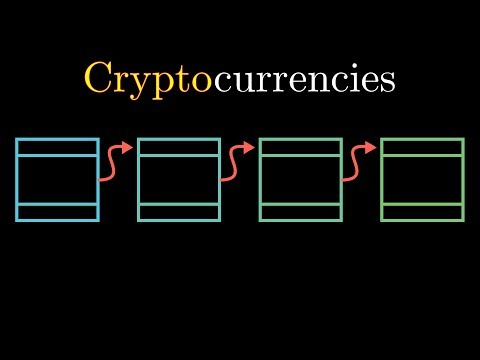

In [968]:
display.YouTubeVideo("bBC-nXj3Ng4", width=640, height=360)

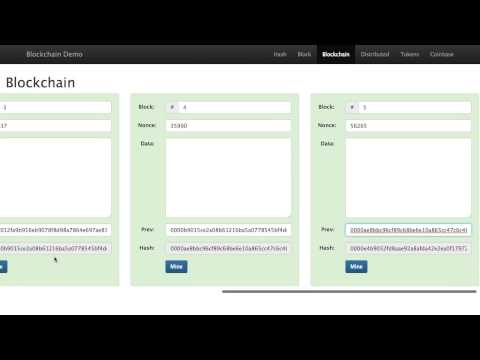

In [923]:
display.YouTubeVideo("_160oMzblY8", width=640, height=360)